In [1]:


# data processing, 
import pandas as pd 

import numpy as np 

import os
for dirname, _, filenames in os.walk('C:/Users/User/Downloads/FYP_EmoVisioMind_FacialEmotionDetectionModel/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical  


In [2]:
# Temporary patch to use numpy's interp instead of scipy's interp
import scipy
scipy.interp = lambda *args, **kwargs: getattr(np, 'interp')(*args, **kwargs)

# scikitplot import
import scikitplot as skplt

# usage of interpolation from numpy
from numpy import interp

In [4]:
import os
import pandas as pd
 
# Define root directory
root_dir = 'archive'
 
# Initialize empty lists to store file names and labels
file_names = []
labels = []
 

for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        # Construct full file path
        file_path = os.path.join(dirpath, file)
        # Extract label from directory path
        label = os.path.basename(os.path.dirname(file_path))
        # Append file path and label their lists
        file_names.append(file_path)
        labels.append(label)
 
# Print total number of file names / labels
print(len(file_names), len(labels))
 
# Create a pandas dataframe from collected file names/ labels
df = pd.DataFrame({'image': file_names, 'label': labels})
print(df.shape)

71838 71838
(71838, 2)


In [211]:
df.head()

,image,label
0,archive\images\images\train\angry\0.jpg,angry
1,archive\images\images\train\angry\1.jpg,angry
2,archive\images\images\train\angry\10.jpg,angry
3,archive\images\images\train\angry\10002.jpg,angry
4,archive\images\images\train\angry\10016.jpg,angry


In [174]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [175]:
# Count occurrences of label
label_counts = df['label'].value_counts()

# label counts
print("Label Counts:")
print(label_counts)


Label Counts:
label
happy       17978
neutral     12396
sad         12154
fear        10242
angry        9906
surprise     8004
disgust      1094
Name: count, dtype: int64


In [176]:
print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


C:\Users\User\AppData\Local\Temp\ipykernel_37944\25937063.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


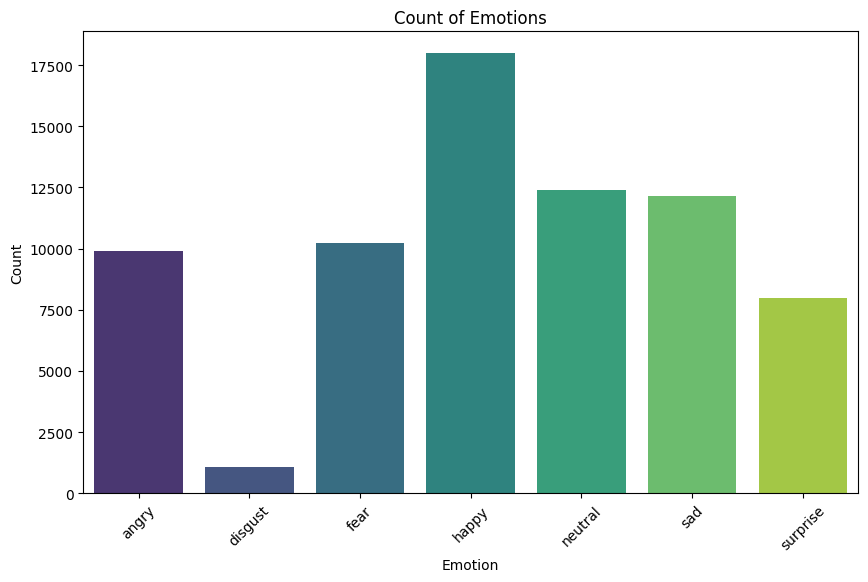

In [177]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))  # Adjust size of plot
sns.countplot(x='label', data=df, palette="viridis")
plt.xticks(rotation=45)  # Rotate x-axis labels 
plt.xlabel('Emotion')  # Label x-axis
plt.ylabel('Count')  # Label y-axis
plt.title('Count of Emotions')  # Title of plot
plt.show()


In [125]:
# import math  # Import the math module

# # Now you can use math.sqrt() function
# math.sqrt(len(df.image[0].split(' ')))


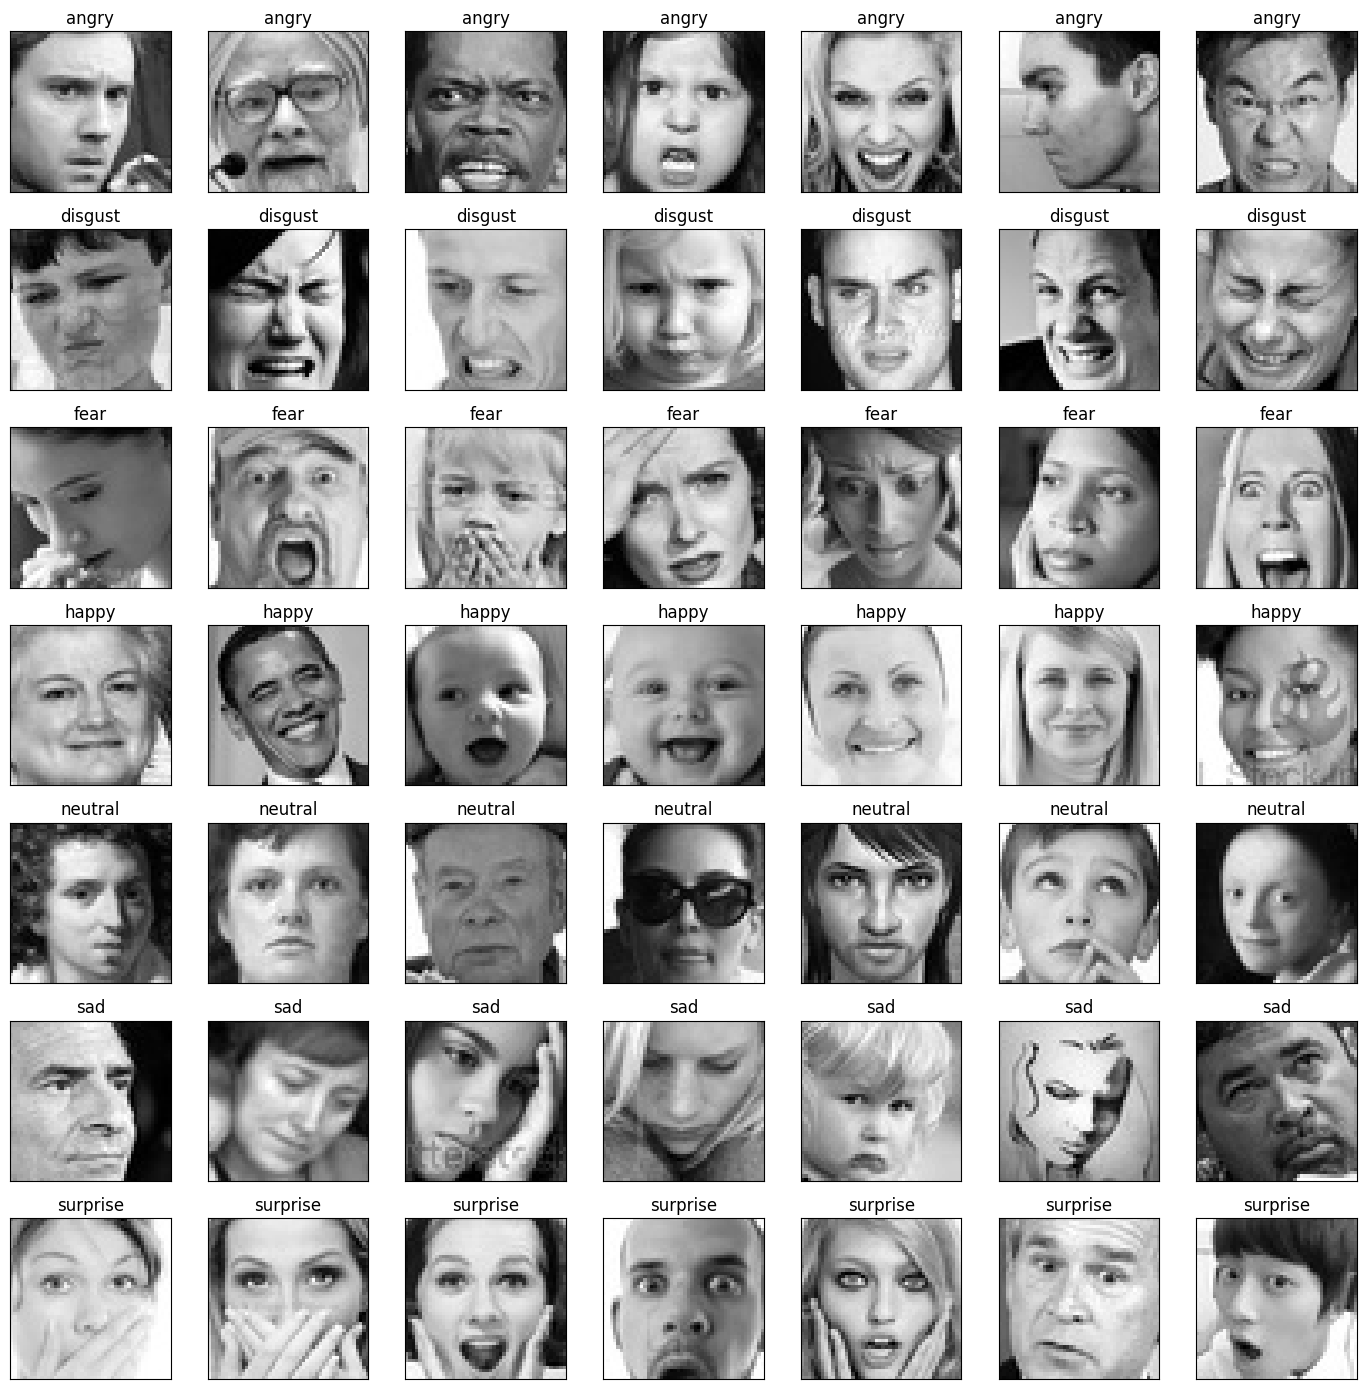

In [178]:
import matplotlib.pyplot as plt  # Import pyplot
from PIL import Image  # Import Image from PIL

# Number of images per label to display
num_images_per_label = 7

# Create a figure object
fig = plt.figure(1, (14, 14))

k = 0
# Iterate through sorted unique labels
for label in sorted(df.label.unique()):
    # Filter DataFrame for current label
    df_label = df[df.label == label]
    
    for j in range(min(num_images_per_label, len(df_label))):
        # Load image from file path
        img_path = df_label.image.iloc[j]
        img = Image.open(img_path)
        
        # Convert image to grayscale
        img = img.convert('L')
        
        # Add image to subplot
        ax = plt.subplot(len(df.label.unique()), num_images_per_label, k + 1)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label)
        
        k += 1

plt.tight_layout()
plt.show()  # Display the plot


In [179]:
print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [180]:
INTERESTED_LABELS = [0, 1, 2, 3, 4, 5, 6]

In [181]:
print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [182]:

print("INTERESTED_LABELS:", INTERESTED_LABELS)


INTERESTED_LABELS: [0, 1, 2, 3, 4, 5, 6]


In [183]:
print(df.columns)


Index(['image', 'label'], dtype='object')


In [184]:

print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [185]:
# list of interested labels
INTERESTED_LABELS = ['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'surprise']  

# Filter DataFrame 
df = df[df['label'].isin(INTERESTED_LABELS)]


print(df.shape)


(71774, 2)


In [186]:
from PIL import Image
import numpy as np

# target image size
img_width, img_height = 48, 48

# to store image data
image_data = []

# Iterate through  DataFrame and load images
for img_path in df['image']:
    # Load / preprocess the image
    img = Image.open(img_path).convert('L')  # Convert grayscale
    img = img.resize((img_width, img_height))  # Resize target dimensions
    img_array = np.array(img, dtype='float32')  # Convert  NumPy array
    
    # Normalize  image
    img_array /= 255.0
    
    # image to  list
    image_data.append(img_array)

# Convert list to  array
img_array = np.array(image_data)


print(img_array.shape)


(71774, 48, 48)


In [187]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform labels from DataFrame
img_labels = le.fit_transform(df.label)  

# Convert labels to categorical format
img_labels = to_categorical(img_labels)

print(img_labels.shape)


(71774, 7)


In [188]:
unique_labels = df.label.unique()
print("Unique labels in the dataset:", unique_labels)


Unique labels in the dataset: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [189]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [190]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((64596, 48, 48), (7178, 48, 48), (64596, 7), (7178, 7))

In [191]:
del df
del img_array
del img_labels

In [193]:
# Adjusting code images are grayscale
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = 1  # Single channel (grayscale images)
num_classes = y_train.shape[1]


In [194]:
# Normalizing results (Neural Net sensitive to unormlised data)
X_train = X_train / 255.
X_valid = X_valid / 255.

In [195]:
def build_net(optim):
    # DCNN
    # dropouts (regular interval)
    # BatchNormalization (better results)
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [196]:

# 2 callbacks = 'early stopping' avoid early stopping, `ReduceLROnPlateau` for learning rate

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [198]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Add channel dimension
X_train = np.expand_dims(X_train, axis=-1)  # Shape: (num_samples, height, width, 1)
X_valid = np.expand_dims(X_valid, axis=-1)  # Shape: (num_samples, height, width, 1)

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

# Fit the ImageDataGenerator
train_datagen.fit(X_train)

# Example usage with flow method (for training)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


In [199]:
batch_size = 32  # batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

# Nadam (more popular than Adam)
model = build_net(optims[1]) 

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    callbacks=callbacks
)



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  kernel_regularizer=None,


Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2170s 1s/step - accuracy: 0.2276 - loss: 2.1751 - val_accuracy: 0.2513 - val_loss: 2.0388 - learning_rate: 0.0010
Epoch 2/100
   1/2018 ━━━━━━━━━━━━━━━━━━━━ 41:14 1s/step - accuracy: 0.2812 - loss: 1.5836

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2018/2018 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.2812 - loss: 0.7922 - val_accuracy: 0.2444 - val_loss: 2.0399 - learning_rate: 0.0010
Epoch 3/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2040s 1s/step - accuracy: 0.4102 - loss: 1.5168 - val_accuracy: 0.3119 - val_loss: 1.6702 - learning_rate: 0.0010
Epoch 4/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.4688 - loss: 0.6348 - val_accuracy: 0.3029 - val_loss: 1.6689 - learning_rate: 0.0010
Epoch 5/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2559s 1s/step - accuracy: 0.4916 - loss: 1.3385 - val_accuracy: 0.1728 - val_loss: 4.3575 - learning_rate: 0.0010
Epoch 6/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 99s 48ms/step - accuracy: 0.5000 - loss: 0.5545 - val_accuracy: 0.1728 - val_loss: 4.3644 - learning_rate: 0.0010
Epoch 7/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 2520s 1s/step - accuracy: 0.5278 - loss: 1.2462 - val_accuracy: 0.2572 - val_loss: 1.7690 - learning_rate: 0.0010
Epoch 8/100
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0

In [200]:
# Now the model saved can be used to convert into TFLite (EmoVisioMind mobile app intergration purpose)
model.save('C:/Users/User/Downloads/FYP Emotion Recognition ViT/model/testmodel.h5')
 


225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step
Total wrong validation predictions: 2106


              precision    recall  f1-score   support

           0       0.60      0.72      0.65       991
           1       0.87      0.44      0.59       109
           2       0.58      0.44      0.50      1024
           3       0.90      0.90      0.90      1798
           4       0.62      0.74      0.68      1240
           5       0.65      0.56      0.60      1216
           6       0.78      0.80      0.79       800

    accuracy                           0.71      7178
   macro avg       0.71      0.66      0.67      7178
weighted avg       0.71      0.71      0.70      7178



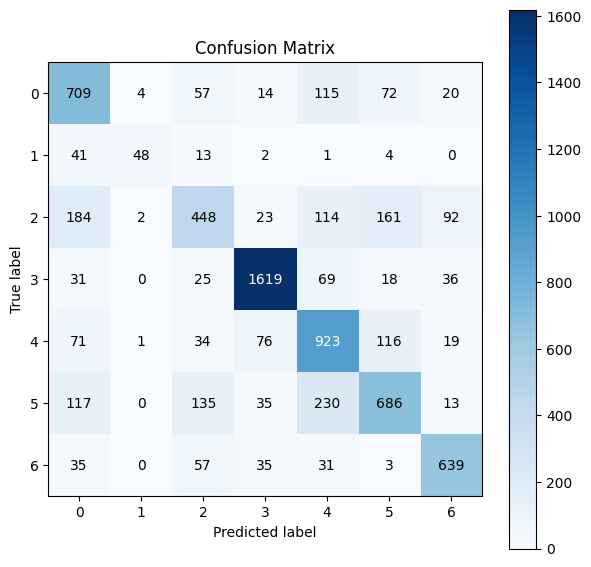

In [201]:
import numpy as np
import scikitplot as skplt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict class probabilities
yhat_valid_probs = model.predict(X_valid)

# Convert probabilities to class labels
yhat_valid = np.argmax(yhat_valid_probs, axis=1)

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7, 7))
plt.savefig("confusion_matrix_dcnn.png")

# Print total wrong validation predictions and classification report
print(f'Total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))


In [203]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
Predicted emotion: fear


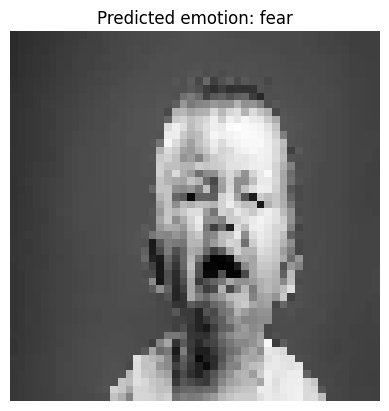

In [206]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model_path = 'C:/Users/User/Downloads/FYP Emotion Recognition ViT/model/testmodel.h5'
model = load_model(model_path)

# Load and preprocess the image
img_path = 'C:/Users/User/Downloads/FYP Emotion Recognition ViT/image.png'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted label to the emotion
emotion_label_to_text = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
predicted_emotion = emotion_label_to_text[predicted_class[0]]

# Print the result
print(f'Predicted emotion: {predicted_emotion}')

# Display the image
plt.imshow(img, cmap='gray')
plt.title(f'Predicted emotion: {predicted_emotion}')
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
 
# Load Keras model
model = tf.keras.models.load_model('model\testmodel.h5')
 
# Convert model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
 
# Save TensorFlow Lite model
with open('saran.tflite', 'wb') as f:
    f.write(tflite_model)
 